In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import BayesianRidge

In [2]:
#preprocess:
# collect the various features
#cat_ftrs = ['Continent','Country','Status'] 
cat_ftrs = ['Continent','Status'] 
num_ftrs = ['Adult_Mortality','Alcohol','Percentage_Expenditure','Hepatitis_B_Vaccine','Measles_Vaccine',
            'Body_Mass_Index','Deaths_Under_5','Polio_Vaccine','Total_Expenditure','Diphtheria_Vaccine','HIV/AIDS_Cases',
            'GDP','Population','Thinness_1-19_Years','Income_Composition_of_Resources','Schooling']

random_state = 42


df = pd.read_csv("Life_Exp_Moded.csv")
df.drop(columns=['Country'],inplace=True)


# let's separate the feature matrix X, and target variable y
y = df['Life_Expectancy'] 
X = df.loc[:, df.columns != 'Life_Expectancy'] # all other columns are features

X_train_, X_other_, y_train, y_other_ = train_test_split(X, y, train_size=0.6, random_state= random_state)
X_val_, X_test_, y_val, y_test = train_test_split(X_other_, y_other_, test_size=0.5, random_state= random_state)

# one-hot encoder
# We need to replace the NaN with a string first!
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'))])

# standard scaler
numeric_transformer = Pipeline(steps=[
    ('imputer', IterativeImputer(estimator = BayesianRidge())),
    ('scaler', StandardScaler())])

# collect the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_ftrs),
        ('cat', categorical_transformer, cat_ftrs)])  
clf = Pipeline(steps=[('preprocessor', preprocessor)]) # for now we only preprocess 
                                                       # later on we will add other steps here
    
X_train = clf.fit_transform(X_train_)
X_test = clf.transform(X_test_)
X_val = clf.transform(X_val_)


In [25]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(1756, 24)
(586, 24)
(586, 24)


In [26]:
X_train

array([[ 0.70646413, -1.17790186, -0.38181758, ...,  0.        ,
         0.        ,  1.        ],
       [-0.62162123,  0.18946944, -0.38181758, ...,  0.        ,
         0.        ,  1.        ],
       [-0.15241742,  0.05440285, -0.38181758, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.70114729,  2.22249242,  4.50802667, ...,  0.        ,
         1.        ,  0.        ],
       [ 2.54351632,  0.98074337,  0.04973175, ...,  0.        ,
         0.        ,  1.        ],
       [-0.61366862, -1.11470814,  0.42412614, ...,  0.        ,
         0.        ,  1.        ]])

# Linear Regression

In [28]:
#Linear Regression

linreg = LinearRegression(fit_intercept=True, normalize=True).fit(X_train, y_train)
y_new= linreg.predict(X_test)
y_newval= linreg.predict(X_val)

print("test R2 Score: ",r2_score(y_new, y_test))
print("val R2 Score: ",r2_score(y_newval, y_val))

print("test MSE: ",mean_squared_error(y_new, y_test))
print("val MSE: ",mean_squared_error(y_newval, y_val))

print("test MAE: ",mean_absolute_error(y_new, y_test))
print("val MAE: ",mean_absolute_error(y_newval, y_val))

print("test RMSE: ",np.sqrt(mean_squared_error(y_new, y_test)))
print("val RMSE: ",np.sqrt(mean_squared_error(y_newval, y_val)))

test R2 Score:  0.8154114140475239
val R2 Score:  0.8253924112165916
test MSE:  14.012055069670634
val MSE:  13.276876456824057
test MAE:  2.8153938191897976
val MAE:  2.8149318455009382
test RMSE:  3.743267966586233
val RMSE:  3.6437448396977605


In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
from sklearn.linear_model import Ridge

# Logistic regression - Not for regression problem

# Decision tree in regression - Random Forest Regressor

In [29]:
#A decision tree in regression -max_depth = 1
from sklearn.ensemble import RandomForestRegressor

RFreg = RandomForestRegressor(n_estimators=1,max_depth=1,random_state=random_state)
RFreg.fit(X_train, y_train)
y_new = RFreg.predict(X_test)
y_newval= RFreg.predict(X_val)

print("test R2 Score: ",r2_score(y_new, y_test))
print("val R2 Score: ",r2_score(y_newval, y_val))

print("test MSE: ",mean_squared_error(y_new, y_test))
print("val MSE: ",mean_squared_error(y_newval, y_val))

print("test MAE: ",mean_absolute_error(y_new, y_test))
print("val MAE: ",mean_absolute_error(y_newval, y_val))

print("test RMSE: ",np.sqrt(mean_squared_error(y_new, y_test)))
print("val RMSE: ",np.sqrt(mean_squared_error(y_newval, y_val)))

test R2 Score:  0.27094636362757774
val R2 Score:  0.17401872968447063
test MSE:  36.83657938639859
val MSE:  42.62033548189617
test MAE:  4.698183789698394
val MAE:  5.008991737445724
test RMSE:  6.069314573030351
val RMSE:  6.528425191567731


In [30]:
#A decision tree in regression -max_depth = 3
RFreg = RandomForestRegressor(n_estimators=1,max_depth=3,random_state=random_state)
RFreg.fit(X_train, y_train)
y_new = RFreg.predict(X_test)
y_newval= RFreg.predict(X_val)

print("test R2 Score: ",r2_score(y_new, y_test))
print("val R2 Score: ",r2_score(y_newval, y_val))

print("test MSE: ",mean_squared_error(y_new, y_test))
print("val MSE: ",mean_squared_error(y_newval, y_val))

print("test MAE: ",mean_absolute_error(y_new, y_test))
print("val MAE: ",mean_absolute_error(y_newval, y_val))

print("test RMSE: ",np.sqrt(mean_squared_error(y_new, y_test)))
print("val RMSE: ",np.sqrt(mean_squared_error(y_newval, y_val)))

test R2 Score:  0.7965684522750858
val R2 Score:  0.7806072407795397
test MSE:  15.20253542018583
val MSE:  16.22205725009507
test MAE:  2.7947596653063562
val MAE:  2.9170863590371603
test RMSE:  3.899042885143203
val RMSE:  4.02766151136054


In [31]:
#A decision tree in regression -max_depth = 6
RFreg = RandomForestRegressor(n_estimators=1,max_depth=6,random_state=random_state)
RFreg.fit(X_train, y_train)
y_new = RFreg.predict(X_test)
y_newval= RFreg.predict(X_val)

print("test R2 Score: ",r2_score(y_new, y_test))
print("val R2 Score: ",r2_score(y_newval, y_val))

print("test MSE: ",mean_squared_error(y_new, y_test))
print("val MSE: ",mean_squared_error(y_newval, y_val))

print("test MAE: ",mean_absolute_error(y_new, y_test))
print("val MAE: ",mean_absolute_error(y_newval, y_val))

print("test RMSE: ",np.sqrt(mean_squared_error(y_new, y_test)))
print("val RMSE: ",np.sqrt(mean_squared_error(y_newval, y_val)))

test R2 Score:  0.883548510013391
val R2 Score:  0.8899913897216133
test MSE:  9.443251749035818
val MSE:  8.945190392307575
test MAE:  2.1602709758391483
val MAE:  2.091189417590858
test RMSE:  3.0729874306667475
val RMSE:  2.990851115035246


In [32]:
#A decision tree in regression -max_depth = 10
RFreg = RandomForestRegressor(n_estimators=1,max_depth=10,random_state=random_state)
RFreg.fit(X_train, y_train)
y_new = RFreg.predict(X_test)
y_newval= RFreg.predict(X_val)

print("test R2 Score: ",r2_score(y_new, y_test))
print("val R2 Score: ",r2_score(y_newval, y_val))

print("test MSE: ",mean_squared_error(y_new, y_test))
print("val MSE: ",mean_squared_error(y_newval, y_val))

print("test MAE: ",mean_absolute_error(y_new, y_test))
print("val MAE: ",mean_absolute_error(y_newval, y_val))

print("test RMSE: ",np.sqrt(mean_squared_error(y_new, y_test)))
print("val RMSE: ",np.sqrt(mean_squared_error(y_newval, y_val)))

test R2 Score:  0.8895122993734117
val R2 Score:  0.889648574326114
test MSE:  9.46542489165339
val MSE:  9.724703450844194
test MAE:  2.0309390513438337
val MAE:  1.9905474311852933
test RMSE:  3.076593065657756
val RMSE:  3.1184456786745853


# SVM - SVR

In [33]:
# SVM - SVR - gamma = 1
from sklearn.svm import SVR

svr_reg = SVR(gamma = 1, C = 1)
svr_reg.fit(X_train, y_train)
y_new = svr_reg.predict(X_test)
y_newval= svr_reg.predict(X_val)

print("test R2 Score: ",r2_score(y_new, y_test))
print("val R2 Score: ",r2_score(y_newval, y_val))

print("test MSE: ",mean_squared_error(y_new, y_test))
print("val MSE: ",mean_squared_error(y_newval, y_val))

print("test MAE: ",mean_absolute_error(y_new, y_test))
print("val MAE: ",mean_absolute_error(y_newval, y_val))

print("test RMSE: ",np.sqrt(mean_squared_error(y_new, y_test)))
print("val RMSE: ",np.sqrt(mean_squared_error(y_newval, y_val)))

test R2 Score:  -5.601862507947571
val R2 Score:  -6.339491565299282
test MSE:  63.24011129350475
val MSE:  66.44572783549087
test MAE:  5.5799081319661585
val MAE:  5.497483396736803
test RMSE:  7.952365138341219
val RMSE:  8.15142489602222


In [34]:
# SVM - SVR - gamma = 1
from sklearn.svm import SVR

svr_reg = SVR(gamma = 1, C = 1)
svr_reg.fit(X_train, y_train)
y_new = svr_reg.predict(X_test)
y_newval= svr_reg.predict(X_val)

print("test R2 Score: ",r2_score(y_new, y_test))
print("val R2 Score: ",r2_score(y_newval, y_val))

print("test MSE: ",mean_squared_error(y_new, y_test))
print("val MSE: ",mean_squared_error(y_newval, y_val))

print("test MAE: ",mean_absolute_error(y_new, y_test))
print("val MAE: ",mean_absolute_error(y_newval, y_val))

print("test RMSE: ",np.sqrt(mean_squared_error(y_new, y_test)))
print("val RMSE: ",np.sqrt(mean_squared_error(y_newval, y_val)))

test R2 Score:  -5.601862507947571
val R2 Score:  -6.339491565299282
test MSE:  63.24011129350475
val MSE:  66.44572783549087
test MAE:  5.5799081319661585
val MAE:  5.497483396736803
test RMSE:  7.952365138341219
val RMSE:  8.15142489602222


In [35]:
# SVM - SVR - gamma = 1000000
from sklearn.svm import SVR

svr_reg = SVR(gamma = 1000000, C = 1)
svr_reg.fit(X_train, y_train)
y_new = svr_reg.predict(X_test)
y_newval= svr_reg.predict(X_val)

print("test R2 Score: ",r2_score(y_new, y_test))
print("val R2 Score: ",r2_score(y_newval, y_val))

print("test MSE: ",mean_squared_error(y_new, y_test))
print("val MSE: ",mean_squared_error(y_newval, y_val))

print("test MAE: ",mean_absolute_error(y_new, y_test))
print("val MAE: ",mean_absolute_error(y_newval, y_val))

print("test RMSE: ",np.sqrt(mean_squared_error(y_new, y_test)))
print("val RMSE: ",np.sqrt(mean_squared_error(y_newval, y_val)))

test R2 Score:  -4.7356487278558115e+29
val R2 Score:  -4.860522381101735e+29
test MSE:  95.63566444198575
val MSE:  98.1574677863143
test MAE:  7.432881766354606
val MAE:  7.385269891509523
test RMSE:  9.779348876177071
val RMSE:  9.907445068548919


In [36]:
# SVM - SVR - gamma = 1000
from sklearn.svm import SVR

svr_reg = SVR(gamma = 1000, C = 1)
svr_reg.fit(X_train, y_train)
y_new = svr_reg.predict(X_test)
y_newval= svr_reg.predict(X_val)

print("test R2 Score: ",r2_score(y_new, y_test))
print("val R2 Score: ",r2_score(y_newval, y_val))

print("test MSE: ",mean_squared_error(y_new, y_test))
print("val MSE: ",mean_squared_error(y_newval, y_val))

print("test MAE: ",mean_absolute_error(y_new, y_test))
print("val MAE: ",mean_absolute_error(y_newval, y_val))

print("test RMSE: ",np.sqrt(mean_squared_error(y_new, y_test)))
print("val RMSE: ",np.sqrt(mean_squared_error(y_newval, y_val)))

test R2 Score:  -14599870.832839217
val R2 Score:  -10552965.847904604
test MSE:  95.63427418655348
val MSE:  98.15180385645648
test MAE:  7.432694399372228
val MAE:  7.385086709607792
test RMSE:  9.779277794732772
val RMSE:  9.90715922232284


In [37]:
# SVM - SVR - gamma = 0.001
from sklearn.svm import SVR

svr_reg = SVR(gamma = 0.001, C = 1)
svr_reg.fit(X_train, y_train)
y_new = svr_reg.predict(X_test)
y_newval= svr_reg.predict(X_val)

print("test R2 Score: ",r2_score(y_new, y_test))
print("val R2 Score: ",r2_score(y_newval, y_val))

print("test MSE: ",mean_squared_error(y_new, y_test))
print("val MSE: ",mean_squared_error(y_newval, y_val))

print("test MAE: ",mean_absolute_error(y_new, y_test))
print("val MAE: ",mean_absolute_error(y_newval, y_val))

print("test RMSE: ",np.sqrt(mean_squared_error(y_new, y_test)))
print("val RMSE: ",np.sqrt(mean_squared_error(y_newval, y_val)))

test R2 Score:  0.3578297306865652
val R2 Score:  0.38485900090728553
test MSE:  23.752434447515526
val MSE:  23.048948116530912
test MAE:  3.666503026212095
val MAE:  3.633249344688894
test RMSE:  4.873646935049309
val RMSE:  4.800932004989335


In [38]:
# SVM - SVR - gamma = 0.01
from sklearn.svm import SVR

svr_reg = SVR(gamma = 0.01, C = 1)
svr_reg.fit(X_train, y_train)
y_new = svr_reg.predict(X_test)
y_newval= svr_reg.predict(X_val)

print("test R2 Score: ",r2_score(y_new, y_test))
print("val R2 Score: ",r2_score(y_newval, y_val))

print("test MSE: ",mean_squared_error(y_new, y_test))
print("val MSE: ",mean_squared_error(y_newval, y_val))

print("test MAE: ",mean_absolute_error(y_new, y_test))
print("val MAE: ",mean_absolute_error(y_newval, y_val))

print("test RMSE: ",np.sqrt(mean_squared_error(y_new, y_test)))
print("val RMSE: ",np.sqrt(mean_squared_error(y_newval, y_val)))

test R2 Score:  0.7614474618009348
val R2 Score:  0.7854006338094071
test MSE:  14.68025262256299
val MSE:  13.584331648746216
test MAE:  2.6985595712159047
val MAE:  2.6839598040865584
test RMSE:  3.8314817789678957
val RMSE:  3.6856928315781032


In [39]:
# SVM - SVR - gamma = 0.1
from sklearn.svm import SVR

svr_reg = SVR(gamma = 0.1, C = 1)
svr_reg.fit(X_train, y_train)
y_new = svr_reg.predict(X_test)
y_newval= svr_reg.predict(X_val)

print("test R2 Score: ",r2_score(y_new, y_test))
print("val R2 Score: ",r2_score(y_newval, y_val))

print("test MSE: ",mean_squared_error(y_new, y_test))
print("val MSE: ",mean_squared_error(y_newval, y_val))

print("test MAE: ",mean_absolute_error(y_new, y_test))
print("val MAE: ",mean_absolute_error(y_newval, y_val))

print("test RMSE: ",np.sqrt(mean_squared_error(y_new, y_test)))
print("val RMSE: ",np.sqrt(mean_squared_error(y_newval, y_val)))

test R2 Score:  0.6764834426367482
val R2 Score:  0.6910985785876036
test MSE:  18.00306469097356
val MSE:  17.109901916580384
test MAE:  2.6451426736111596
val MAE:  2.552433085375952
test RMSE:  4.243001849041968
val RMSE:  4.136411719906564


In [40]:
# SVM - SVR - default
from sklearn.svm import SVR

svr_reg = SVR()
svr_reg.fit(X_train, y_train)
y_new = svr_reg.predict(X_test)
y_newval= svr_reg.predict(X_val)

print("test R2 Score: ",r2_score(y_new, y_test))
print("val R2 Score: ",r2_score(y_newval, y_val))

print("test MSE: ",mean_squared_error(y_new, y_test))
print("val MSE: ",mean_squared_error(y_newval, y_val))

print("test MAE: ",mean_absolute_error(y_new, y_test))
print("val MAE: ",mean_absolute_error(y_newval, y_val))

print("test RMSE: ",np.sqrt(mean_squared_error(y_new, y_test)))
print("val RMSE: ",np.sqrt(mean_squared_error(y_newval, y_val)))

test R2 Score:  0.7439946150011287
val R2 Score:  0.7685121911488789
test MSE:  15.355195220171646
val MSE:  13.97721620937631
test MAE:  2.5420749508952185
val MAE:  2.4632299302089766
test RMSE:  3.9185705582739794
val RMSE:  3.7386115349653957


# XGBoost - XGBRegressor

In [91]:
pip install xgboost

In [41]:
#Xgboostregressor:

import xgboost as xgb

xboost = xgb.XGBRegressor(n_estimators = 200)
xboost.fit(X_train, y_train)
y_new = xboost.predict(X_test)
y_newval= xboost.predict(X_val)

print("test R2 Score: ",r2_score(y_new, y_test))
print("val R2 Score: ",r2_score(y_newval, y_val))

print("test MSE: ",mean_squared_error(y_new, y_test))
print("val MSE: ",mean_squared_error(y_newval, y_val))

print("test MAE: ",mean_absolute_error(y_new, y_test))
print("val MAE: ",mean_absolute_error(y_newval, y_val))

print("test RMSE: ",np.sqrt(mean_squared_error(y_new, y_test)))
print("val RMSE: ",np.sqrt(mean_squared_error(y_newval, y_val)))

test R2 Score:  0.9522768447799969
val R2 Score:  0.9560666008454037
test MSE:  4.12772280827457
val MSE:  3.770129404138808
test MAE:  1.3428121091562735
val MAE:  1.3111716677304421
test RMSE:  2.0316797996422986
val RMSE:  1.941682106869919


# Final Check:

In [5]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
import math

In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import make_scorer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer

In [40]:
def MLpipe_KFold_RMSE(X, y, preprocessor, ML_algo, param_grid):
    '''
    This function splits the data to other/test (80/20) and then applies KFold with 4 folds to other.
    The RMSE is minimized in cross-validation.
    '''
    
    test_scores = []
    best_models = []
    r2_scores = []
    
    # split data to other/test 80/20, and the use timeseries with 4 folds (2 points)
    splits = TimeSeriesSplit(n_splits=5)
    for train_index, test_index in splits.split(X):
        X_other, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
        y_other, y_test = y.iloc[train_index], y.iloc[test_index]

        #X_other, X_test, y_other, y_test = TimeSeriesSplit(X, y, n_splits=4)
        #kf = KFold(n_splits=4, shuffle=True, random_state=42+state)
        kf = splits
        # preprocess the data (1 point)
        pipe = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', ML_algo)])
        # loop through the hyperparameter combinations or use GridSearchCV (2 points)
        grid = GridSearchCV(pipe, param_grid=param_grid, 
                            scoring=make_scorer(mean_squared_error, greater_is_better=False, squared=False),
                            cv=kf, return_train_score=True, n_jobs=-1)
        # for each combination, calculate the train and validation scores using the evaluation metric
        grid.fit(X_other, y_other)
        # find which hyperparameter combination gives the best validation score (1 point)
        best_param = grid.best_params_
        print('best model parameters:',best_param)
        print('validation RMSE score:',grid.best_score_)
        # calculate the test score (1 point)
        test_score = mean_squared_error(y_test, grid.predict(X_test), squared=False)
        print('test score:',test_score)
        # append the test score and the best model to the lists (1 point)
        test_scores.append(test_score)
        r2_scr = r2_score(y_test,grid.predict(X_test))
        print('test R2 score: ', r2_scr)
        #print('test R2 score: ', r2_scr)
        r2_scores.append(r2_scr)
        best_models.append(grid.best_estimator_)
        print("-------\n")
    return best_models, test_scores, r2_scores

In [41]:

ML_algo = Lasso()
param_grid = {'regressor__alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2]}

models, scores, r2_scores = MLpipe_KFold_RMSE(X,y,preprocessor,ML_algo,param_grid)
print(scores)


print("__RSME: ")
print("Mean: ",np.mean(scores))
print("Std: ",np.std(scores))
lasso_rsme_m = np.mean(scores)
lasso_rsme_s = np.std(scores)


print("__R2: ")
print("Mean: ",np.mean(r2_scores))
print("Std: ",np.std(r2_scores))

lasso_r2_m = np.mean(r2_scores)
lasso_r2_s =np.std(r2_scores)

best model parameters: {'regressor__alpha': 0.01}
validation RMSE score: -4.19860098112061
test score: 3.9962427644493066
test R2 score:  0.8411726599719045
-------

best model parameters: {'regressor__alpha': 0.01}
validation RMSE score: -4.002539116950647
test score: 3.8850960302138486
test R2 score:  0.8438502475214693
-------

best model parameters: {'regressor__alpha': 0.1}
validation RMSE score: -3.9319702475531386
test score: 3.6693305814885036
test R2 score:  0.8283878267043038
-------

best model parameters: {'regressor__alpha': 0.01}
validation RMSE score: -3.835674737153912
test score: 3.617053214757827
test R2 score:  0.8405526306757566
-------

best model parameters: {'regressor__alpha': 0.1}
validation RMSE score: -3.775704601192275
test score: 3.4867029365388755
test R2 score:  0.8231179237636632
-------

[3.9962427644493066, 3.8850960302138486, 3.6693305814885036, 3.617053214757827, 3.4867029365388755]
__RSME: 
Mean:  3.730885105489672
Std:  0.1846982874197462
__R2: 
Me

In [42]:
print(len(scores))

5


In [43]:
ML_algo = Ridge()
param_grid = {'regressor__alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2]}
models, scores, r2_scores = MLpipe_KFold_RMSE(X,y,preprocessor,ML_algo,param_grid)
print(scores)


print("__RSME: ")
print("Mean: ",np.mean(scores))
print("Std: ",np.std(scores))
ridge_rsme_m = np.mean(scores)
ridge_rsme_s = np.std(scores)


print("__R2: ")
print("Mean: ",np.mean(r2_scores))
print("Std: ",np.std(r2_scores))

ridge_r2_m = np.mean(r2_scores)
ridge_r2_s =np.std(r2_scores)

best model parameters: {'regressor__alpha': 1.0}
validation RMSE score: -4.206088448597254
test score: 4.001488900516765
test R2 score:  0.8407553796390879
-------

best model parameters: {'regressor__alpha': 1.0}
validation RMSE score: -4.009341627817761
test score: 3.8970042479406253
test R2 score:  0.8428915505101993
-------

best model parameters: {'regressor__alpha': 10.0}
validation RMSE score: -3.941069875158239
test score: 3.663758973805659
test R2 score:  0.8289085918717104
-------

best model parameters: {'regressor__alpha': 10.0}
validation RMSE score: -3.8354240827219357
test score: 3.6134950140846738
test R2 score:  0.840866182424058
-------

best model parameters: {'regressor__alpha': 10.0}
validation RMSE score: -3.7732900632683184
test score: 3.4393927709545773
test R2 score:  0.8278854916842093
-------

[4.001488900516765, 3.8970042479406253, 3.663758973805659, 3.6134950140846738, 3.4393927709545773]
__RSME: 
Mean:  3.72302798146046
Std:  0.20187493335692078
__R2: 
Mea

In [44]:
ML_algo = ElasticNet()
param_grid = {'regressor__alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2], 
              'regressor__l1_ratio': [0.1, 0.25, 0.5, 0.75, 0.9], 
              'regressor__max_iter': [100000]}
models, scores, r2_scores = MLpipe_KFold_RMSE(X,y,preprocessor,ML_algo,param_grid)
print(scores)


print("__RSME: ")
print("Mean: ",np.mean(scores))
print("Std: ",np.std(scores))
Elas_rsme_m = np.mean(scores)
Elas_rsme_s = np.std(scores)


print("__R2: ")
print("Mean: ",np.mean(r2_scores))
print("Std: ",np.std(r2_scores))

Elas_r2_m = np.mean(r2_scores)
Elas_r2_s =np.std(r2_scores)

best model parameters: {'regressor__alpha': 0.01, 'regressor__l1_ratio': 0.9, 'regressor__max_iter': 100000}
validation RMSE score: -4.199131058071388
test score: 3.9962999436925735
test R2 score:  0.8411681148565953
-------

best model parameters: {'regressor__alpha': 0.01, 'regressor__l1_ratio': 0.9, 'regressor__max_iter': 100000}
validation RMSE score: -4.002910533515637
test score: 3.884051256931472
test R2 score:  0.8439342192701013
-------

best model parameters: {'regressor__alpha': 0.01, 'regressor__l1_ratio': 0.9, 'regressor__max_iter': 100000}
validation RMSE score: -3.932796951725332
test score: 3.6732105892126534
test R2 score:  0.8280247040110845
-------

best model parameters: {'regressor__alpha': 0.01, 'regressor__l1_ratio': 0.1, 'regressor__max_iter': 100000}
validation RMSE score: -3.8326422445246733
test score: 3.6084897035944734
test R2 score:  0.8413067323675197
-------

best model parameters: {'regressor__alpha': 0.01, 'regressor__l1_ratio': 0.1, 'regressor__max_it

In [45]:
ML_algo = RandomForestRegressor()
param_grid = {'regressor__max_features': [3, 5, 7, None], 
              'regressor__max_depth': [1, 3, 5, 10, 20, None]}
models, scores, r2_scores = MLpipe_KFold_RMSE(X,y,preprocessor,ML_algo,param_grid)
print(scores)


print("__RSME: ")
print("Mean: ",np.mean(scores))
print("Std: ",np.std(scores))
randF_rsme_m = np.mean(scores)
randF_rsme_s = np.std(scores)


print("__R2: ")
print("Mean: ",np.mean(r2_scores))
print("Std: ",np.std(r2_scores))

randF_r2_m = np.mean(r2_scores)
randF_r2_s =np.std(r2_scores)

best model parameters: {'regressor__max_depth': None, 'regressor__max_features': None}
validation RMSE score: -2.731428059176229
test score: 2.270640027216273
test R2 score:  0.9487235304894495
-------

best model parameters: {'regressor__max_depth': 10, 'regressor__max_features': None}
validation RMSE score: -2.253309865038953
test score: 2.4455911778866692
test R2 score:  0.9381263833394342
-------

best model parameters: {'regressor__max_depth': None, 'regressor__max_features': None}
validation RMSE score: -2.2121602458062704
test score: 2.532512984447157
test R2 score:  0.9182518803845343
-------

best model parameters: {'regressor__max_depth': 20, 'regressor__max_features': 7}
validation RMSE score: -2.227730579001639
test score: 2.373003268328965
test R2 score:  0.9313715429952507
-------

best model parameters: {'regressor__max_depth': None, 'regressor__max_features': 7}
validation RMSE score: -2.281494114878103
test score: 2.2170447570849885
test R2 score:  0.9284840596377457
-

In [46]:
ML_algo = SVR()
param_grid = {'regressor__C': np.logspace(-1, 1, 5), 
              'regressor__gamma': list(np.logspace(-1, 2, 5)) + ['scale']}

models, scores, r2_scores = MLpipe_KFold_RMSE(X,y,preprocessor,ML_algo,param_grid)
print(scores)


print("__RSME: ")
print("Mean: ",np.mean(scores))
print("Std: ",np.std(scores))
svr_rsme_m = np.mean(scores)
svr_rsme_s = np.std(scores)


print("__R2: ")
print("Mean: ",np.mean(r2_scores))
print("Std: ",np.std(r2_scores))

svr_r2_m = np.mean(r2_scores)
svr_r2_s =np.std(r2_scores)

best model parameters: {'regressor__C': 10.0, 'regressor__gamma': 'scale'}
validation RMSE score: -3.6993608501571584
test score: 3.4145494267121745
test R2 score:  0.8840453033729481
-------

best model parameters: {'regressor__C': 10.0, 'regressor__gamma': 'scale'}
validation RMSE score: -3.1771853672793924
test score: 2.8352094542899726
test R2 score:  0.916841225418179
-------

best model parameters: {'regressor__C': 10.0, 'regressor__gamma': 'scale'}
validation RMSE score: -3.026194691766467
test score: 2.6416615340497995
test R2 score:  0.9110535222131428
-------

best model parameters: {'regressor__C': 10.0, 'regressor__gamma': 'scale'}
validation RMSE score: -2.8717263331705807
test score: 2.6097556712511643
test R2 score:  0.9169944250871037
-------

best model parameters: {'regressor__C': 10.0, 'regressor__gamma': 'scale'}
validation RMSE score: -2.814136859295716
test score: 2.720313590020962
test R2 score:  0.8923307037013559
-------

[3.4145494267121745, 2.8352094542899726

In [48]:
ML_algo = KNeighborsRegressor()
param_grid = {'regressor__n_neighbors': [1, 2, 3, 5, 10, 30, 80], 
              'regressor__weights': ['uniform', 'distance']}

models, scores, r2_scores = MLpipe_KFold_RMSE(X,y,preprocessor,ML_algo,param_grid)
print(scores)


print("__RSME: ")
print("Mean: ",np.mean(scores))
print("Std: ",np.std(scores))
kn_rsme_m = np.mean(scores)
kn_rsme_s = np.std(scores)


print("__R2: ")
print("Mean: ",np.mean(r2_scores))
print("Std: ",np.std(r2_scores))

kn_r2_m = np.mean(r2_scores)
kn_r2_s =np.std(r2_scores)

best model parameters: {'regressor__n_neighbors': 5, 'regressor__weights': 'distance'}
validation RMSE score: -3.568194749732803
test score: 3.219881567934645
test R2 score:  0.8968898704165864
-------

best model parameters: {'regressor__n_neighbors': 5, 'regressor__weights': 'distance'}
validation RMSE score: -3.0235200244512535
test score: 3.1114192066996704
test R2 score:  0.89984910361807
-------

best model parameters: {'regressor__n_neighbors': 3, 'regressor__weights': 'distance'}
validation RMSE score: -2.9893854108972717
test score: 2.895596474801715
test R2 score:  0.8931313092745731
-------

best model parameters: {'regressor__n_neighbors': 3, 'regressor__weights': 'distance'}
validation RMSE score: -2.88930391041121
test score: 3.05532480542304
test R2 score:  0.8862314209416696
-------

best model parameters: {'regressor__n_neighbors': 3, 'regressor__weights': 'distance'}
validation RMSE score: -2.93316286665033
test score: 3.2245042682815592
test R2 score:  0.848720582146

In [49]:
import xgboost as xgb

ML_algo = xgb.XGBRegressor() # initialize 
param_grid = {"regressor__learning_rate": [0.02, 0.03],
              "regressor__n_estimators": [10000],
              "regressor__seed": [0],
              "regressor__missing": [np.nan], 
              "regressor__colsample_bytree": [0.8, 0.9],              
              "regressor__subsample": [0.8 ,0.66]}
models, scores, r2_scores = MLpipe_KFold_RMSE(X,y,preprocessor,ML_algo,param_grid)
print(scores)


print("__RSME: ")
print("Mean: ",np.mean(scores))
print("Std: ",np.std(scores))
xg_rsme_m = np.mean(scores)
xg_rsme_s = np.std(scores)


print("__R2: ")
print("Mean: ",np.mean(r2_scores))
print("Std: ",np.std(r2_scores))

xg_r2_m = np.mean(r2_scores)
xg_r2_s =np.std(r2_scores)

best model parameters: {'regressor__colsample_bytree': 0.9, 'regressor__learning_rate': 0.03, 'regressor__missing': nan, 'regressor__n_estimators': 10000, 'regressor__seed': 0, 'regressor__subsample': 0.66}
validation RMSE score: -2.543882712512928
test score: 2.2782280068411254
test R2 score:  0.9483802484904209
-------

best model parameters: {'regressor__colsample_bytree': 0.9, 'regressor__learning_rate': 0.02, 'regressor__missing': nan, 'regressor__n_estimators': 10000, 'regressor__seed': 0, 'regressor__subsample': 0.8}
validation RMSE score: -2.1291338977401493
test score: 2.220855069216989
test R2 score:  0.948975563183822
-------

best model parameters: {'regressor__colsample_bytree': 0.9, 'regressor__learning_rate': 0.02, 'regressor__missing': nan, 'regressor__n_estimators': 10000, 'regressor__seed': 0, 'regressor__subsample': 0.66}
validation RMSE score: -2.0916119838828378
test score: 2.3163598190884764
test R2 score:  0.9316109681125788
-------

best model parameters: {'regr

In [50]:
#plot
plt_models = ['LinearRegress-Lasso','LinearRegress-Ridge','LinearRegress-ElasticNet',
              'RandomForest','SVR','KNeighbors','XGboost']
avg_RSME_mean = [lasso_rsme_m, ridge_rsme_m, Elas_rsme_m, randF_rsme_m, svr_rsme_m, kn_rsme_m, xg_rsme_m]

avg_RSME_std = [lasso_rsme_s, ridge_rsme_s, Elas_rsme_s, randF_rsme_s, svr_rsme_s, kn_rsme_s, xg_rsme_s]

avg_R2_mean = [lasso_r2_m, ridge_r2_m, Elas_r2_m, randF_r2_m, svr_r2_m, kn_r2_m, xg_r2_m]

avg_R2_std = [lasso_r2_s, ridge_r2_s, Elas_r2_s, randF_r2_s, svr_r2_s, kn_r2_s, xg_r2_s]

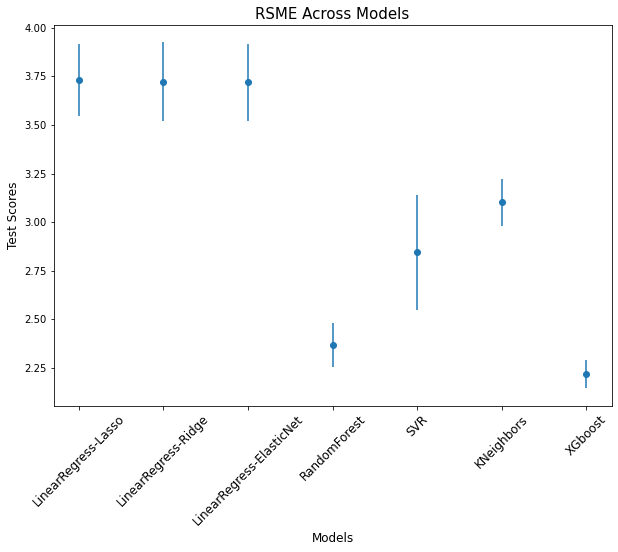

In [51]:
import matplotlib.pyplot as plt

plt.errorbar(plt_models,avg_RSME_mean,yerr=avg_RSME_std,fmt='o',label='RSME')


plt.ylabel('Test Scores', fontsize=12)
plt.xlabel('Models', fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.title('RSME Across Models', fontsize=15)
fig = plt.gcf()
fig.set_size_inches(10, 7, forward=True)   

plt.show()


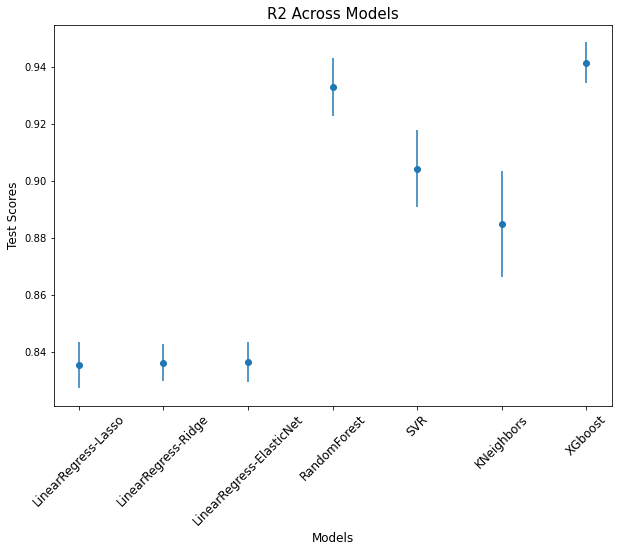

In [52]:
plt.errorbar(plt_models,avg_R2_mean,yerr=avg_R2_std,fmt='o',label='R2 Score')
plt.ylabel('Test Scores', fontsize=12)
plt.xlabel('Models', fontsize=12)
plt.xticks(rotation=45, fontsize=12)

plt.title('R2 Across Models', fontsize=15)
fig = plt.gcf()
fig.set_size_inches(10, 7, forward=True)   
plt.show()

# Trash bin:

def MLpipe_KFold_RMSE(X,y,preprocessor,ML_algo,param_grid):
    '''
    This function splits the data to other/test (80/20) and then applies KFold with 4 folds to other.
    The RMSE is minimized in cross-validation.
    '''    
    test_scores = []
    best_models = []
    r2_scores = []
    # loop through 10 random states (2 points)[x]
    random_states = [1,45,78,22,67,12,37,23,47,17]
    for random_state in random_states:
        global random_st
        random_st = random_state
        print('Random State:',random_state)
        
        # split data to other/test 80/20, [x]
        #and the use KFold with 4 folds (2 points) [x]
        X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
        #kf = KFold(n_splits=4,shuffle=True,random_state=random_state)
        
        n = 5
        kf = TimeSeriesSplit(n_splits=n)
        
        # preprocess the data (1 point)[x]
        pipe = make_pipeline(preprocessor,ML_algo)
        
        # loop through the hyperparameter combinations or use GridSearchCV (2 points)[]
        grid = GridSearchCV(pipe, param_grid=param_grid,
                            scoring = 'neg_root_mean_squared_error',
                        cv=kf, return_train_score = True)
        grid.fit(X_other, y_other)
        
        # for each combination, calculate the train and validation scores using the evaluation metric[x]
             # GridSearchCV loops through all parameter combinations and collects the results 
            # save results into a data frame.
        results = pd.DataFrame(grid.cv_results_)
    
        # find which hyperparameter combination gives the best validation score (1 point)[x]
        print('best model parameters:',grid.best_params_)
        print('validation RMSE score:',grid.best_score_)
        
        
        
        # calculate the test score (1 point)[]
        test_RMSE = math.sqrt(mean_squared_error(y_test,grid.predict(X_test)))
        print('test score:',test_RMSE)
        r2_scr = r2_score(y_test,grid.predict(X_test))
        print('test R2 score: ', r2_scr)
        # append the test score and the best model to the lists (1 point)[]     
        test_scores.append(test_RMSE)
        best_models.append(grid.best_score_)
        r2_scores.append(r2_scr)
        #print(sorted(x for x in results))
        
        print("-------\n")
    return best_models, test_scores, r2_scores



preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_ftrs),
        ('cat', categorical_transformer, cat_ftrs)])  
clf = Pipeline(steps=[('preprocessor', preprocessor)]) # if you had a more complex dataset, you'd have a ColumnTransformer here
